In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
data = pd.read_csv('/content/drive/MyDrive/kerjaa /data analyst/Crash Data/crash_data.csv')

<ipython-input-55-1cfcad6f76ca>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/kerjaa /data analyst/Crash Data/crash_data.csv')


# Preprocessing

In [ ]:
data.duplicated().sum()

0

In [56]:
data.isna().sum()

,0
Report Number,0
Local Case Number,0
Agency Name,0
ACRS Report Type,0
Crash Date/Time,0
Route Type,16973
Road Name,15937
Cross-Street Type,17006
Cross-Street Name,15951
Off-Road Description,156170


In [57]:
# Fill missing values for string features with the most frequent value
string_features = data.select_dtypes(include=['object']).columns
for feature in string_features:
  data[feature] = data[feature].fillna(data[feature].mode()[0])

# Fill missing values for integer features with the median value
int_features = data.select_dtypes(include=['int64']).columns
for feature in int_features:
  data[feature] = data[feature].fillna(data[feature].median())


In [ ]:
data.isna().sum()

,0
Report Number,0
Local Case Number,0
Agency Name,0
ACRS Report Type,0
Crash Date/Time,0
Route Type,0
Road Name,0
Cross-Street Type,0
Cross-Street Name,0
Off-Road Description,0


In [58]:
pd.set_option('display.max_columns', None)
data.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,01/03/2024 02:55:00 PM,Maryland (State),GEORGIA AVE,County,GEORGIA AVE,IN FRONT OF 18900 BIRDSEYE DR,ROCKVILLE,PEDESTRIAN,OPPOSITE DIRECTION SIDESWIPE,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NONE DETECTED,ACC015E9-08A4-4856-866E-0004005F986C,Yes,NO APPARENT INJURY,"RAIN, SNOW, WET",LOOKED BUT DID NOT SEE,MD,4E492574-893B-4EB1-ADCA-53FDD633D6C4,FUNCTIONAL,SEVEN OCLOCK,SEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,South,South,0,No,No,2017,LEXUS,SUV,NO MISUSE,39.165005,-77.249310,"(39.16500483, -77.24931)"
1,MCP3254003K,230072050,Montgomery County Police,Injury Crash,12/16/2023 12:36:00 PM,Maryland (State),GERMANTOWN RD,County,MIDDLEBROOK RD,PARKING LOT,ROCKVILLE,BICYCLIST,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NONE DETECTED,76C65B60-90BF-4706-B78A-D277E9DC2E44,No,NO APPARENT INJURY,"RAIN, SNOW, WET",NOT DISTRACTED,MD,6D16232C-4E1E-49A6-B3A2-7FDEF7E506F2,FUNCTIONAL,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,North,West,35,No,No,2010,TOYT,PRIUS,NO MISUSE,39.178776,-77.267190,"(39.17877577, -77.26718974)"
2,EJ7887003Q,230074270,Gaithersburg Police Depar,Injury Crash,12/29/2023 12:00:00 PM,Maryland (State),GREAT SENECA HWY,Municipality,KENTLANDS BLVD,PARKING LOT,GAITHERSBURG,PEDESTRIAN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NONE DETECTED,B27B0A06-056C-4963-BCE7-2AE19BAD7061,No,SUSPECTED MINOR INJURY,"RAIN, SNOW, WET",NOT DISTRACTED,MD,82ED056D-33FA-44A5-AA2B-8DCE653FA03C,FUNCTIONAL,SIX OCLOCK,SIX OCLOCK,(SPORT) UTILITY VEHICLE,MOVING CONSTANT SPEED,South,South,35,No,No,2021,SUBARU,FORRESTER,NO MISUSE,39.123574,-77.231769,"(39.12357374, -77.231769)"
3,MCP2674004J,230064598,Montgomery County Police,Property Damage Crash,11/05/2023 09:07:00 PM,Maryland (State),WOODFIELD RD,County,GLENDALOUGH RD,PARKING LOT,ROCKVILLE,PEDESTRIAN,SINGLE VEHICLE,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,NONE DETECTED,59A2A81B-B4F7-4FCE-B8C4-A2EC656A177D,No,NO APPARENT INJURY,"ANIMAL, N/A",NOT DISTRACTED,MD,3CD099CA-F5FF-4174-B184-02BCF2C89934,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,POLICE VEHICLE/NON EMERGENCY,MOVING CONSTANT SPEED,South,South,40,No,No,2019,DODGE,CHARGER,NO MISUSE,39.211742,-77.171461,"(39.21174219, -77.17146065)"
4,MCP25280008,230067019,Montgomery County Police,Property Damage Crash,11/18/2023 12:40:00 AM,Maryland (State),CLARKSBURG RD,Maryland (State),CLARKSBURG RD,PARKING LOT,ROCKVILLE,PEDESTRIAN,SINGLE VEHICLE,RAINING,WET,DARK LIGHTS ON,YIELD SIGN,NONE DETECTED,NONE DETECTED,BACFA4BA-C75D-46A4-A181-1B4C0C3F8592,Yes,NO APPARENT INJURY,"RAIN, SNOW, WET",NOT DISTRACTED,MD,64940511-7ACF-4F66-9A1B-5F476A46C2A5,DISABLING,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,North,North,20,No,No,2014,NISSAN,ROGUE,NO MISUSE,39.228915,-77.289091,"(39.22891483, -77.28909117)"


# Geographic Analysis

In [59]:
# Find correlation between all features with cross-street name as a target

data_encoded = data.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode object type features
for col in data_encoded.select_dtypes(include=['object']):
  # Check if column contains both strings and numbers
  if data_encoded[col].apply(type).nunique() > 1:
    # Handle mixed types (example: convert numbers to strings)
    data_encoded[col] = data_encoded[col].astype(str)
  data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Extract correlations with 'Cross Street Name'
cross_street_correlations = correlation_matrix['Cross-Street Name'].sort_values(ascending=False)

print(cross_street_correlations)

Cross-Street Name                 1.000000
Speed Limit                       0.096053
Cross-Street Type                 0.074418
Traffic Control                   0.064552
Road Name                         0.037742
Surface Condition                 0.033683
Vehicle Movement                  0.024912
Latitude                          0.018871
Route Type                        0.017953
Location                          0.017219
Weather                           0.011193
Injury Severity                   0.007645
Vehicle Second Impact Location    0.007509
Vehicle First Impact Location     0.007277
Local Case Number                 0.005616
Vehicle Year                      0.003862
Vehicle ID                        0.003271
Crash Date/Time                   0.002569
Related Non-Motorist              0.001916
Drivers License State             0.001527
Vehicle Model                     0.000741
Person ID                         0.000549
Vehicle Body Type                -0.001270
Non-Motoris

In [60]:
# Number of accident of each road name

location_road_accident = data[['Location', 'Road Name']]

# Group by location and road name, and count accident
location_road_counts = location_road_accident.groupby(['Location', 'Road Name']).size().reset_index(name='accident_count')

# Sort by accident count in descending order
location_road_counts = location_road_counts.sort_values('accident_count', ascending=False)

# Display top locations with highest accident counts
print(location_road_counts.head(10))


                          Location                Road Name  accident_count
32567    (39.045425, -76.99073667)            COLUMBIA PIKE              12
46961    (39.0737933, -77.1647059)  EISENHOWER MEMORIAL HWY              10
41808  (39.06099965, -77.09118779)            VEIRS MILL RD               9
188              (38.953, -77.338)              GEORGIA AVE               9
59296     (39.10066667, -76.98297)             GOOD HOPE RD               9
43117  (39.06386667, -77.03958167)              RANDOLPH RD               8
91102    (39.19885333, -77.261145)       FATHER HURLEY BLVD               8
73332     (39.14257667, -77.22036)   MONTGOMERY VILLAGE AVE               8
16092  (39.00851816, -77.01865349)            COLESVILLE RD               8
26890  (39.03334833, -77.12539167)        OLD GEORGETOWN RD               7


In [61]:
# Number of accident of each road name

location_road_accident = data[['Road Name']]

# Group by location and road name, and count accident
location_road_counts = location_road_accident.groupby(['Road Name']).size().reset_index(name='accident_count')

# Sort by accident count in descending order
location_road_counts = location_road_counts.sort_values('accident_count', ascending=False)

# Display top locations with highest accident counts
print(location_road_counts.head(10))

              Road Name  accident_count
1330        GEORGIA AVE           26798
2342  NEW HAMPSHIRE AVE            6832
1280       FREDERICK RD            5768
2961     ROCKVILLE PIKE            4839
767     CONNECTICUT AVE            4093
3514      VEIRS MILL RD            3995
754       COLUMBIA PIKE            3811
2869        RANDOLPH RD            3460
740       COLESVILLE RD            3386
3116     SHADY GROVE RD            3081


## Correlation between location and accident severity

Location            1.000000
Injury Severity     0.060848
ACRS Report Type   -0.054947
Name: Location, dtype: float64


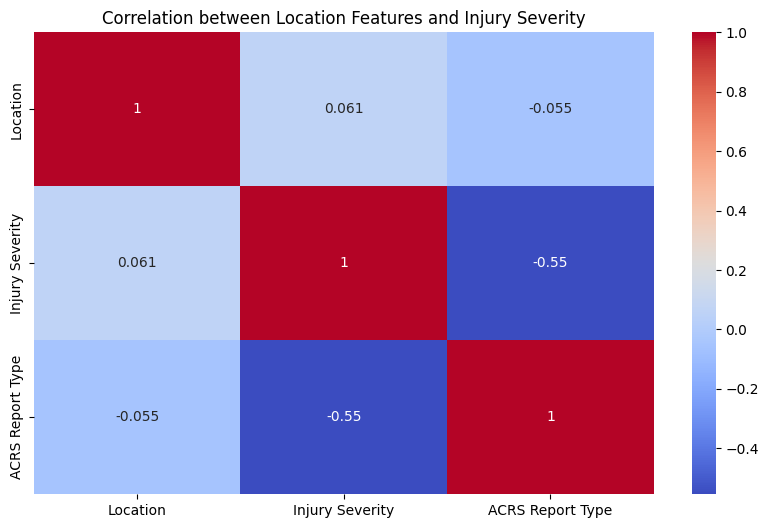

In [8]:
# Correlation between Location, Injury Severity, and ACRS Report Type

for col in ['Location', 'Injury Severity', 'ACRS Report Type']:
    if data_encoded[col].dtype == 'object':
        # Use LabelEncoder to convert string categories to numeric labels
        label_encoder = LabelEncoder()
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

injury_severity_correlations = data_encoded[['Location'] + ['Injury Severity'] + ['ACRS Report Type']].corr()['Location'].sort_values(ascending=False)

print(injury_severity_correlations)

# Visualize correlation using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded[['Location'] + ['Injury Severity'] + ['ACRS Report Type']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Location Features and Injury Severity')
plt.show()

## Investigate if Route Type, Cross-Street Type, Off-Road Description have more accidents.

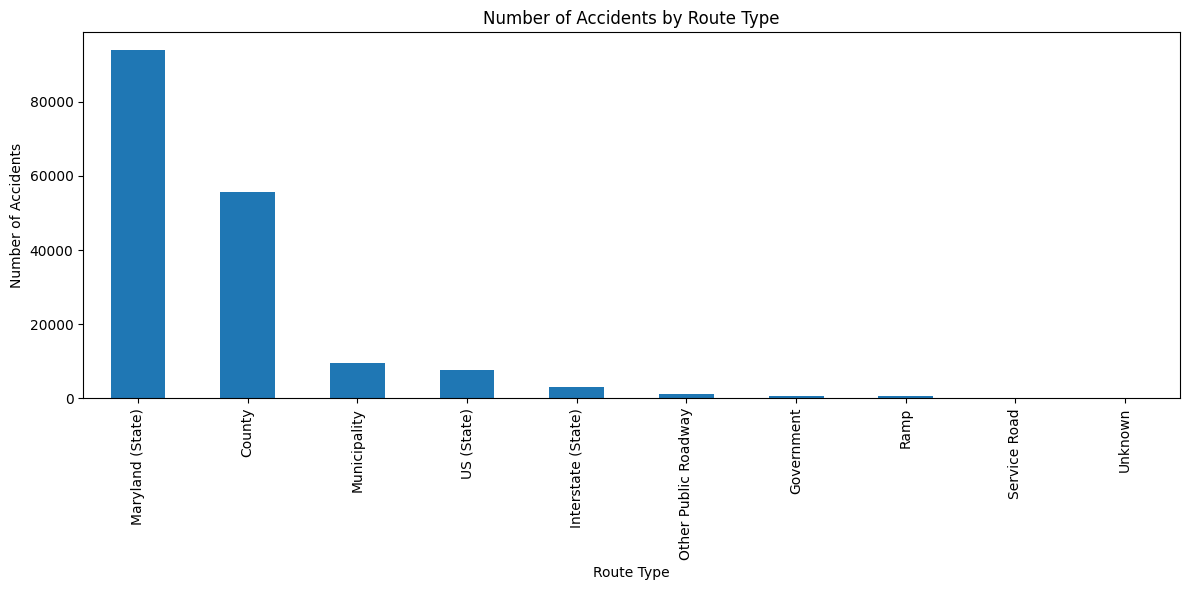

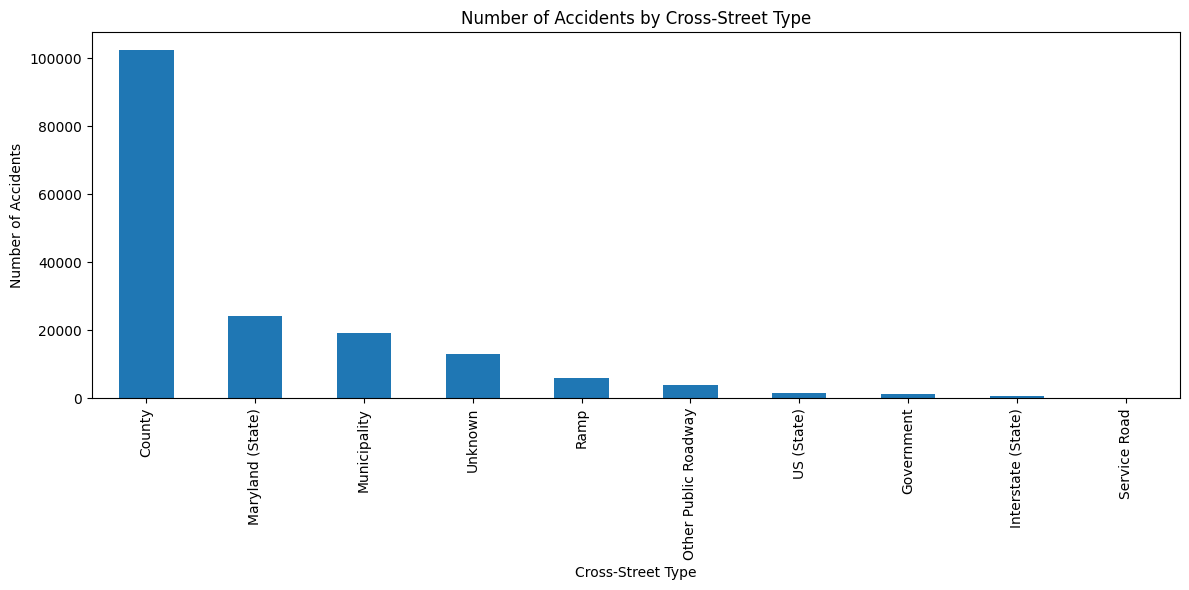

Off-Road Description
PARKING LOT                               156302
PARKING LOT OF 11160 VEIRS MILL RD            15
PARKING LOT OF 10901 WESTLAKE DR              13
PARKING LOT OF 1283 SEVEN LOCKS RD            12
PARKING LOT OF 10323 OLD GEORGETOWN RD        12
PARKING LOT OF 11160 VEIRS MILL ROAD          12
PARKING LOT OF 11920 BOURNEFIELD WAY          12
UNKNOWN                                       11
parking lot                                   10
PARKING LOT OF 7101 DEMOCRACY BLVD            10
Name: count, dtype: int64


In [16]:
# Investigate if Route Type, Cross-Street Type, Off-Road Description have more accidents.

# Group accidents by Route Type and count occurrences
accidents_by_route_type = data['Route Type'].value_counts()

# Group accidents by Cross-Street Type and count occurrences
accidents_by_cross_street_type = data['Cross-Street Type'].value_counts()

# Group accidents by Off-Road Description and count occurrences
accidents_by_off_road_description = data['Off-Road Description'].value_counts()

# Visualize the results
plt.figure(figsize=(12, 6))
accidents_by_route_type.plot(kind='bar')
plt.xlabel('Route Type')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Route Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
accidents_by_cross_street_type.plot(kind='bar')
plt.xlabel('Cross-Street Type')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Cross-Street Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(accidents_by_off_road_description.head(10))

# Temporal Analysis

## Accident trends over time: Analyze accident frequency by day, week, month, or year.

<ipython-input-17-b9cc7a74fb7b>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Crash year'] = pd.to_datetime(data['Crash Date/Time']).dt.year


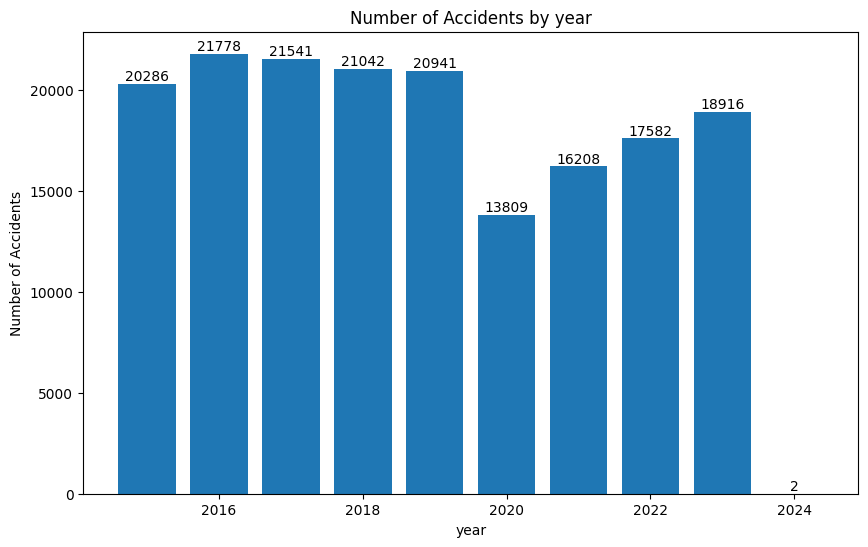

In [17]:
# Number of accident by year all year with values at the end of the bar

data['accident year'] = pd.to_datetime(data['accident Date/Time']).dt.year
yearly_accident_counts = data.groupby('accident year').size().reset_index(name='accident_count')

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_accident_counts['accident year'], yearly_accident_counts['accident_count'])

# Add values at the end of the bars
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center')

plt.xlabel('year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by year')
plt.show()


<ipython-input-18-3523de85f353>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Crash Month'] = pd.to_datetime(data['Crash Date/Time']).dt.month


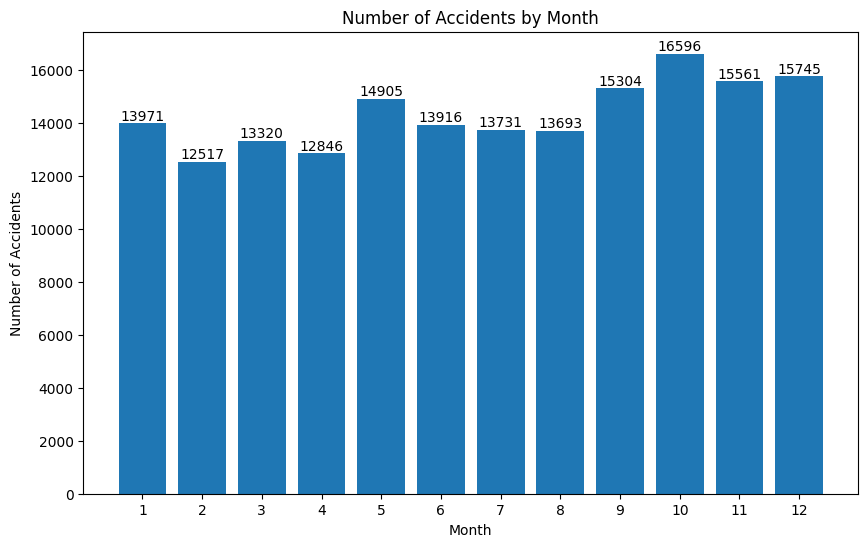

In [18]:
# Number of accident by month all year with values at the end of the bar

data['accident Month'] = pd.to_datetime(data['accident Date/Time']).dt.month
monthly_accident_counts = data.groupby('accident Month').size().reset_index(name='accident_count')

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_accident_counts['accident Month'], monthly_accident_counts['accident_count'])

# Add values at the end of the bars
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center')

plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Month')
plt.xticks(range(1, 13))
plt.show()


<ipython-input-34-0a9e88073366>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  yearly_counts = data.groupby(pd.to_datetime(data['Crash Date/Time']).dt.year).size()


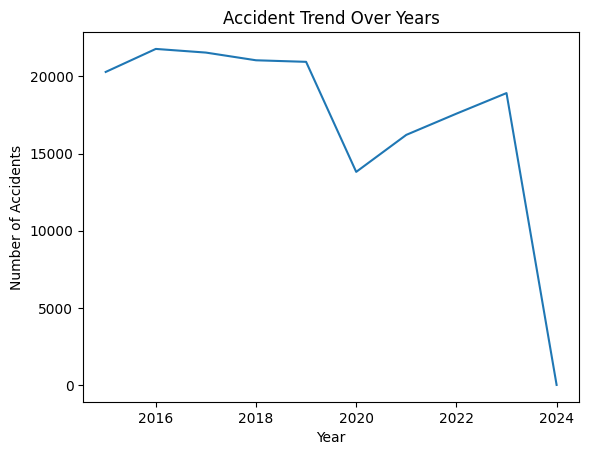

<ipython-input-34-0a9e88073366>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_counts = data.groupby(pd.to_datetime(data['Crash Date/Time']).dt.month).size()


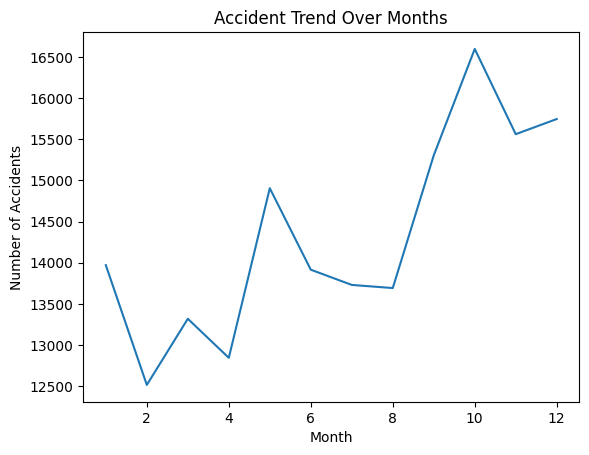

<ipython-input-34-0a9e88073366>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weekday_counts = data.groupby(pd.to_datetime(data['Crash Date/Time']).dt.dayofweek).size()


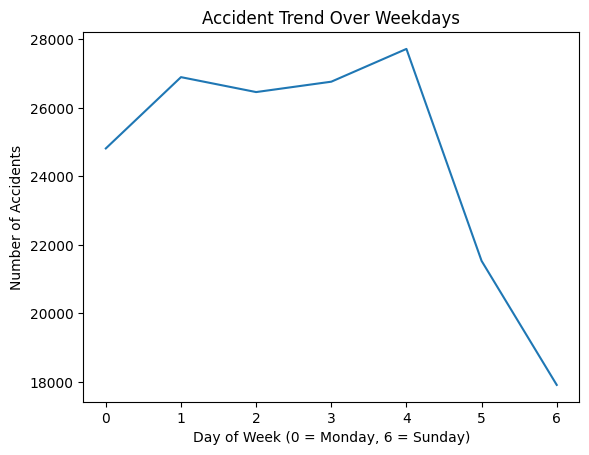

<ipython-input-34-0a9e88073366>:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_counts = data.groupby(pd.to_datetime(data['Crash Date/Time']).dt.hour).size()


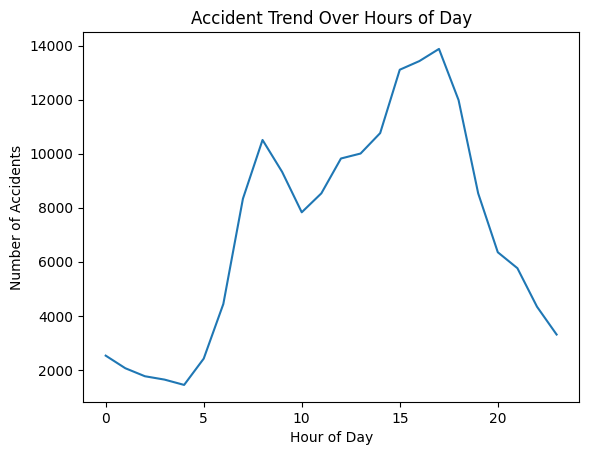

In [ ]:
# Accident trends over time: Analyze accident frequency by day, week, month, or year

# By Year
yearly_counts = data.groupby(pd.to_datetime(data['accident Date/Time']).dt.year).size()
plt.plot(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accident Trend Over Years')
plt.show()

# By Month
monthly_counts = data.groupby(pd.to_datetime(data['accident Date/Time']).dt.month).size()
plt.plot(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Accident Trend Over Months')
plt.show()

# By Day of Week
weekday_counts = data.groupby(pd.to_datetime(data['accident Date/Time']).dt.dayofweek).size()
plt.plot(weekday_counts.index, weekday_counts.values)
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Accidents')
plt.title('Accident Trend Over Weekdays')
plt.show()

# By Hour of Day
hourly_counts = data.groupby(pd.to_datetime(data['accident Date/Time']).dt.hour).size()
plt.plot(hourly_counts.index, hourly_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Accident Trend Over Hours of Day')
plt.show()


## Peak accident hours: Identify time periods with the highest accident rates

<ipython-input-19-babf22f06fa2>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Crash Hour'] = pd.to_datetime(data['Crash Date/Time']).dt.hour
<ipython-input-19-babf22f06fa2>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Crash DayofWeek'] = pd.to_datetime(data['Crash Date/Time']).dt.dayofweek


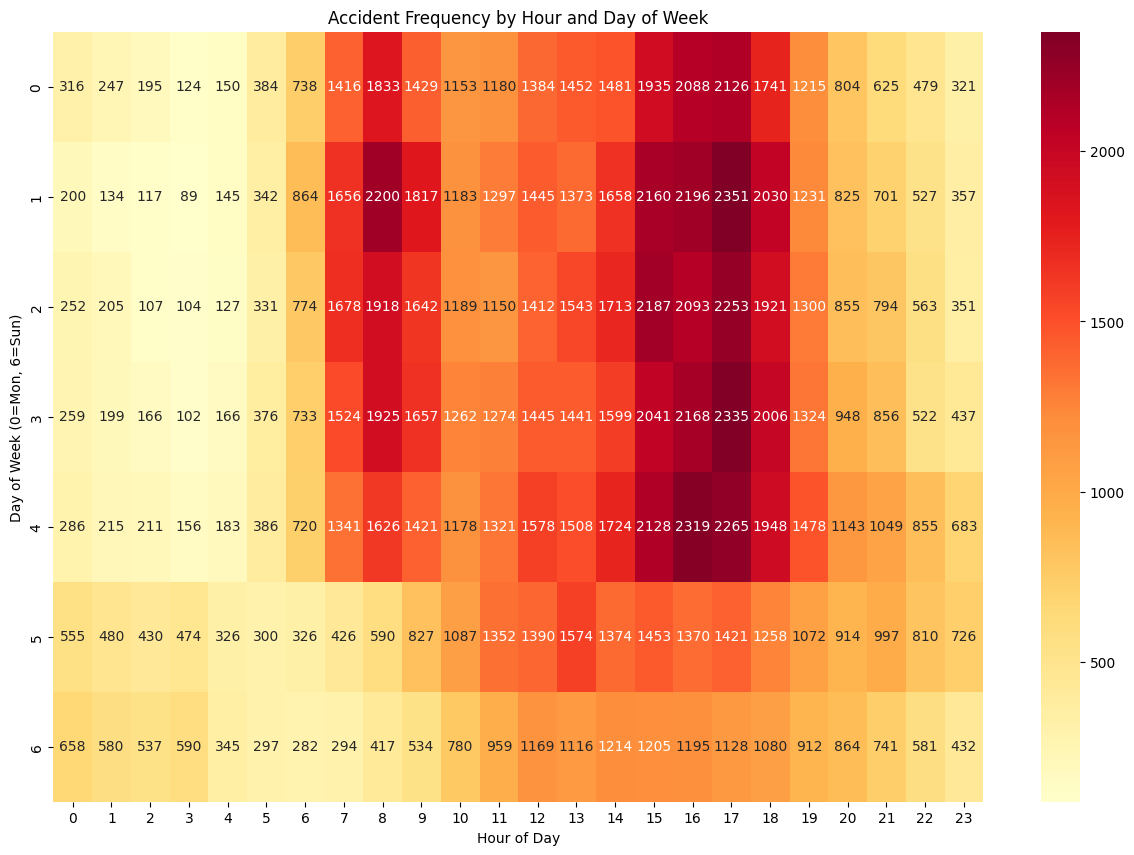

In [19]:
# Accident frequency by hour and day of week

# Extract hour and day of week from 'accident Date/Time'
data['accident Hour'] = pd.to_datetime(data['accident Date/Time']).dt.hour
data['accident DayofWeek'] = pd.to_datetime(data['accident Date/Time']).dt.dayofweek

# Group by hour and day of week, count accidents
hourly_daily_accident_counts = data.groupby(['accident Hour', 'accident DayofWeek']).size().reset_index(name='accident_count')

# Pivot the table for heatmap
heatmap_data = hourly_daily_accident_counts.pivot(index='accident DayofWeek', columns='accident Hour', values='accident_count')

# Create heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Accident Frequency by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.show()


## Impact of weather and surface conditions on accidents: Study the relationship between weather, surface condition and accident frequency

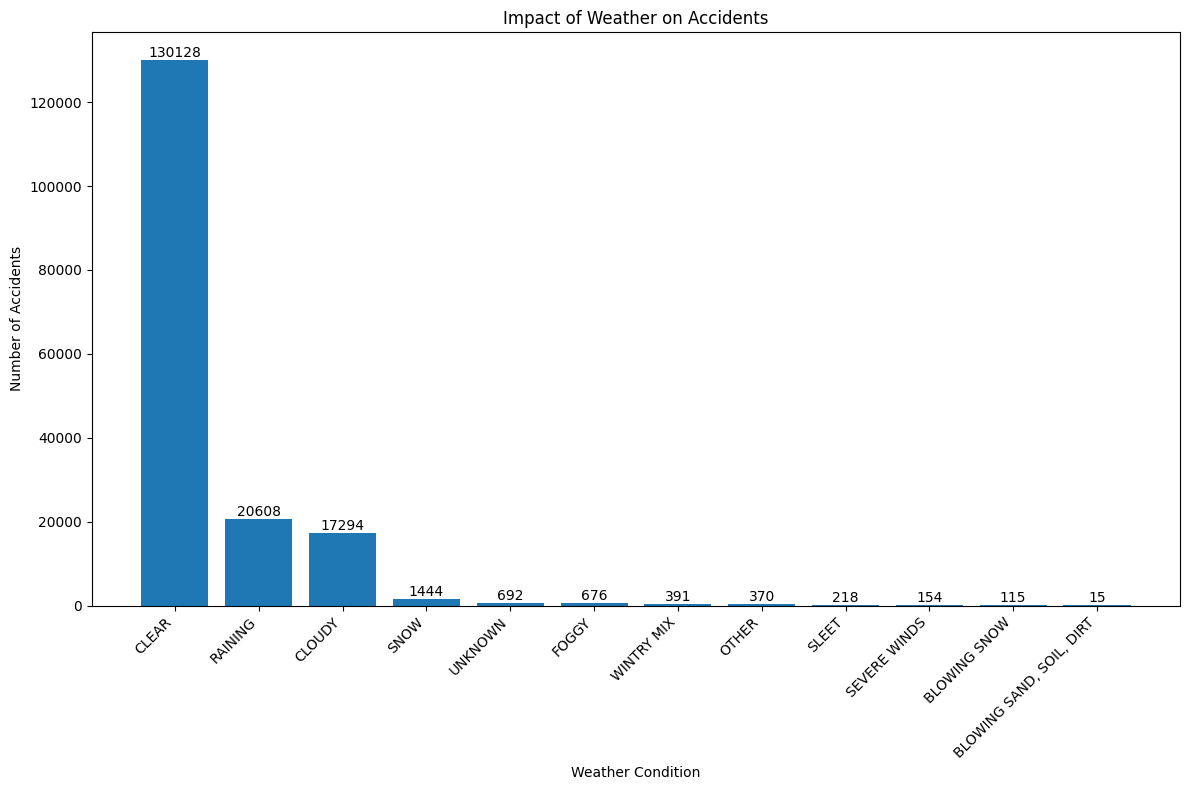

In [31]:
# Impact of weather on accidents: Study the relationship between weather patterns and accident frequency.

import matplotlib.pyplot as plt
# Group by weather condition and count accidents
weather_accident_counts = data.groupby('Weather').size().reset_index(name='accident_count')

# Sort by accident count in descending order
weather_accident_counts = weather_accident_counts.sort_values('accident_count', ascending=False)

# Visualize the impact of weather
plt.figure(figsize=(12, 8))
bars = plt.bar(weather_accident_counts['Weather'], weather_accident_counts['accident_count'])

# Add values at the end of the bars
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center')

plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Impact of Weather on Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

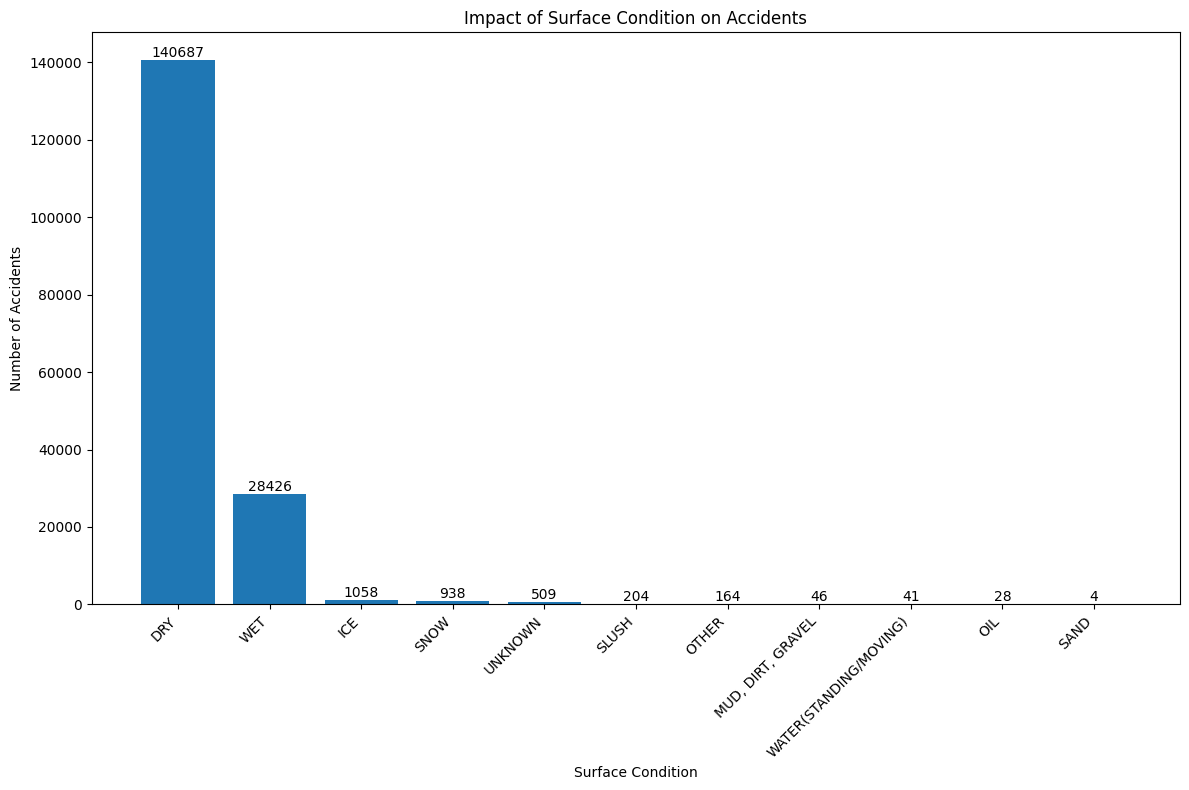

In [33]:
# Impact of Surface Condition on accidents: Study the relationship between Surface Condition patterns and accident frequency.

import matplotlib.pyplot as plt
# Group by Surface Condition condition and count accidents
Surface_Condition_accident_counts = data.groupby('Surface Condition').size().reset_index(name='accident_count')

# Sort by accident count in descending order
Surface_Condition_accident_counts = Surface_Condition_accident_counts.sort_values('accident_count', ascending=False)

# Visualize the impact of Surface Condition
plt.figure(figsize=(12, 8))
bars = plt.bar(Surface_Condition_accident_counts['Surface Condition'], Surface_Condition_accident_counts['accident_count'])

# Add values at the end of the bars
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center')

plt.xlabel('Surface Condition')
plt.ylabel('Number of Accidents')
plt.title('Impact of Surface Condition on Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Road Conditions and Infrastructure

## Impact of Traffic Control on accidents: Study the relationship between Traffic Control patterns and accident frequency

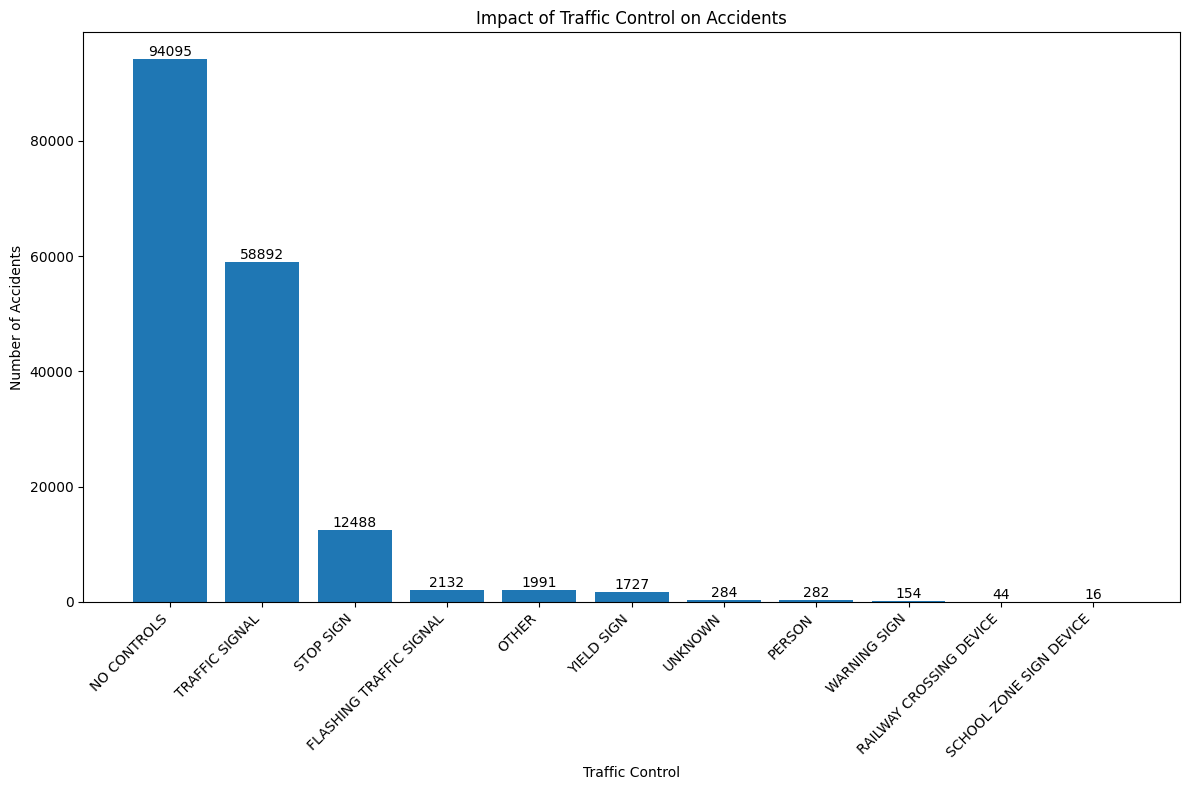

In [34]:
# Impact of Traffic Control on accidents: Study the relationship between Traffic Control patterns and accident frequency.

# Group by Traffic Control condition and count accidents
Traffic_Control_accident_counts = data.groupby('Traffic Control').size().reset_index(name='accident_count')

# Sort by accident count in descending order
Traffic_Control_accident_counts = Traffic_Control_accident_counts.sort_values('accident_count', ascending=False)

# Visualize the impact of Traffic Control
plt.figure(figsize=(12, 8))
bars = plt.bar(Traffic_Control_accident_counts['Traffic Control'], Traffic_Control_accident_counts['accident_count'])

# Add values at the end of the bars
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center')

plt.xlabel('Traffic Control')
plt.ylabel('Number of Accidents')
plt.title('Impact of Traffic Control on Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Lighting conditions: Investigate the influence of light conditions on accident rates.

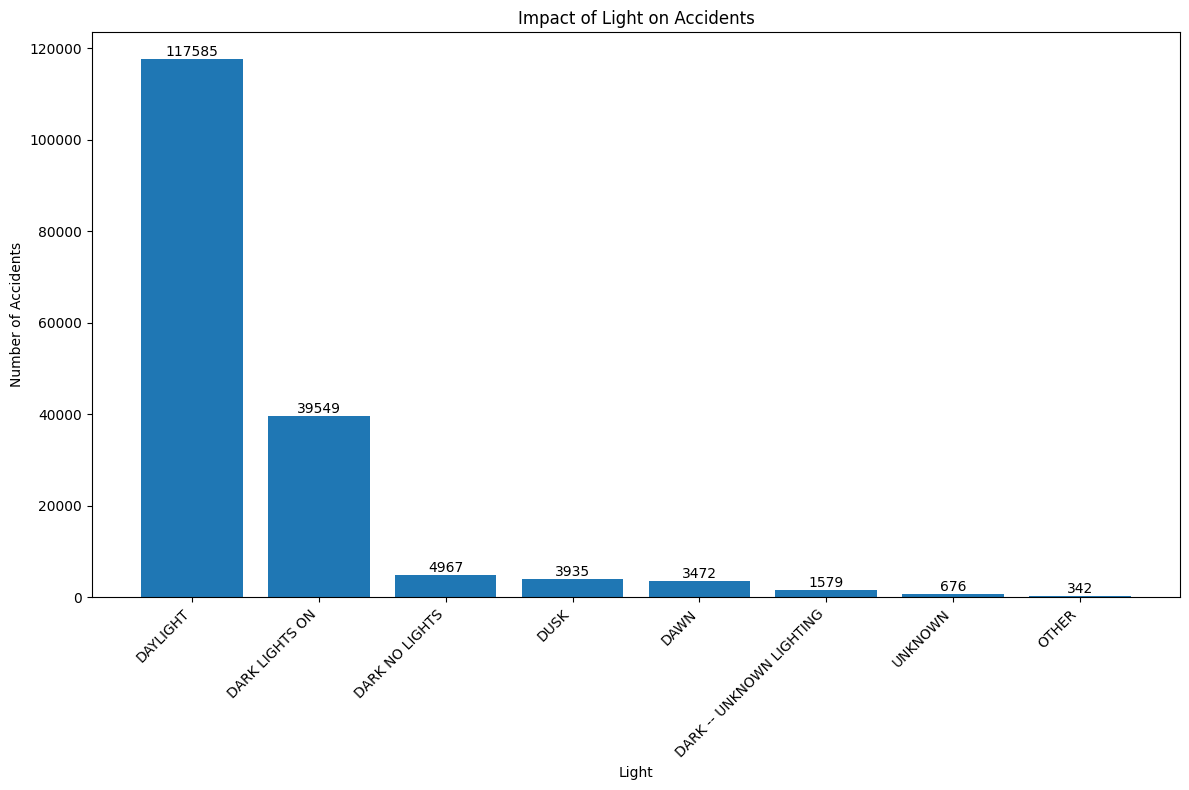

In [35]:
# Impact of Light on accidents: Study the relationship between Light patterns and accident frequency.

# Group by Light and count accidents
Light_Condition_accident_counts = data.groupby('Light').size().reset_index(name='accident_count')

# Sort by accident count in descending order
Light_Condition_accident_counts = Light_Condition_accident_counts.sort_values('accident_count', ascending=False)

# Visualize the impact of Light
plt.figure(figsize=(12, 8))
bars = plt.bar(Light_Condition_accident_counts['Light'], Light_Condition_accident_counts['accident_count'])

# Add values at the end of the bars
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center')

plt.xlabel('Light')
plt.ylabel('Number of Accidents')
plt.title('Impact of Light on Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Accident Characteristics

## Collision type analysis: Identify the most common types of collisions

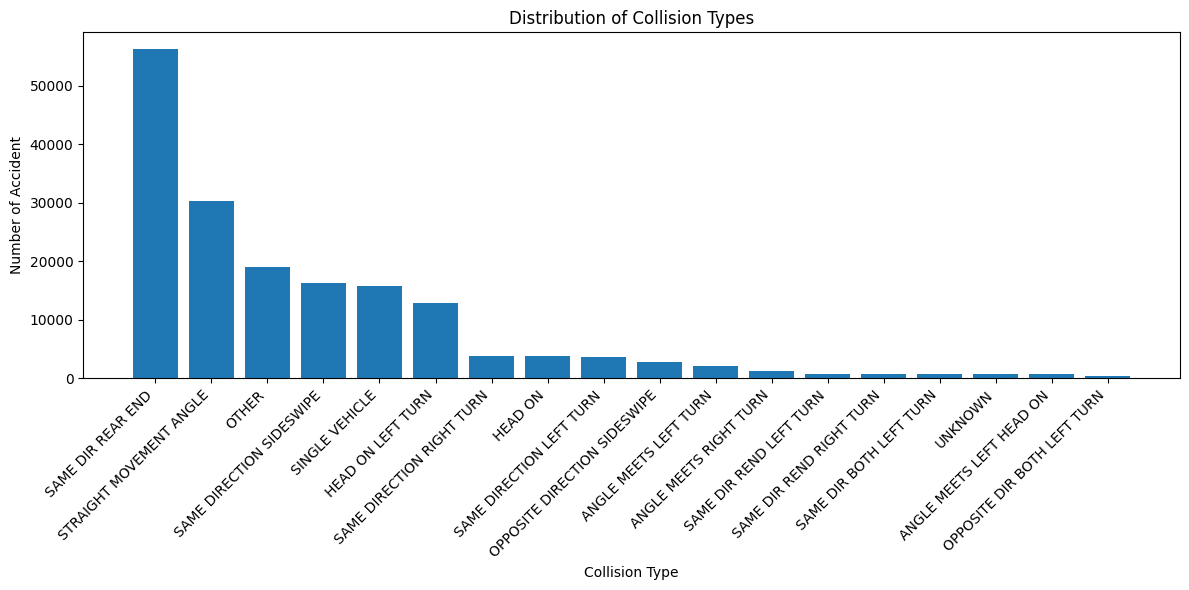

In [52]:
# Group by collision type and count accident
collision_type_counts = data['Collision Type'].value_counts().reset_index()
collision_type_counts.columns = ['Collision Type', 'accident_count']

# Visualize collision type distribution
plt.figure(figsize=(12, 6))
plt.bar(collision_type_counts['Collision Type'], collision_type_counts['accident_count'])
plt.xlabel('Collision Type')
plt.ylabel('Number of Accident')
plt.title('Distribution of Collision Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [46]:
# Number of accident by ACRS Report Type

acrs_accident = data['ACRS Report Type']
acrs_counts = acrs_accident.value_counts().reset_index()
acrs_counts.columns = ['ACRS Report Type', 'accident_count']

print(acrs_counts)

        ACRS Report Type  accident_count
0  Property Damage Crash          109452
1           Injury Crash           62228
2            Fatal Crash             425


In [49]:
# Number of accident by Related Non-Motorist

non_motorist_accident = data['Related Non-Motorist']

# Group by Related_Non-Motorist and count accident
non_motorist_counts = non_motorist_accident.value_counts().reset_index()
non_motorist_counts.columns = ['Related Non-Motorist', 'accident_count']

print(non_motorist_counts)

            Related Non-Motorist  accident_count
0                     PEDESTRIAN          170522
1                      BICYCLIST            1169
2                          OTHER             246
3               OTHER CONVEYANCE              84
4         MACHINE OPERATOR/RIDER              39
5             OTHER PEDALCYCLIST              26
6              OTHER, PEDESTRIAN               9
7               BICYCLIST, OTHER               4
8          BICYCLIST, PEDESTRIAN               3
9        OTHER, OTHER CONVEYANCE               1
10  OTHER CONVEYANCE, PEDESTRIAN               1
11           IN ANIMAL-DRAWN VEH               1


## Driver behavior analysis: Explore the impact of driver distractions, substance abuse, and speeding on accidents

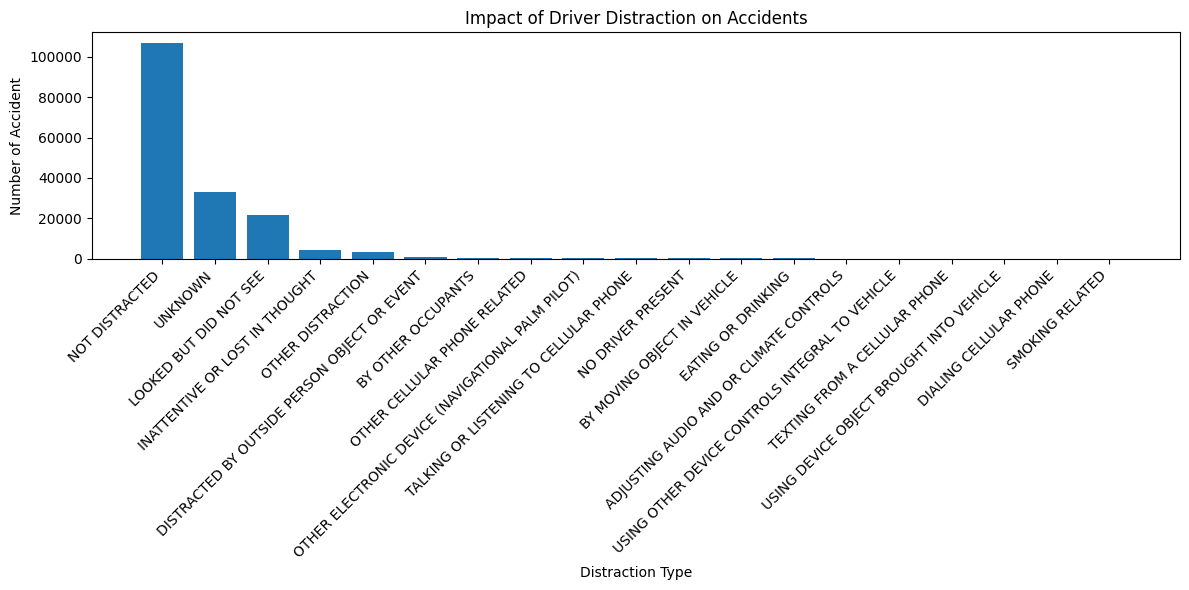

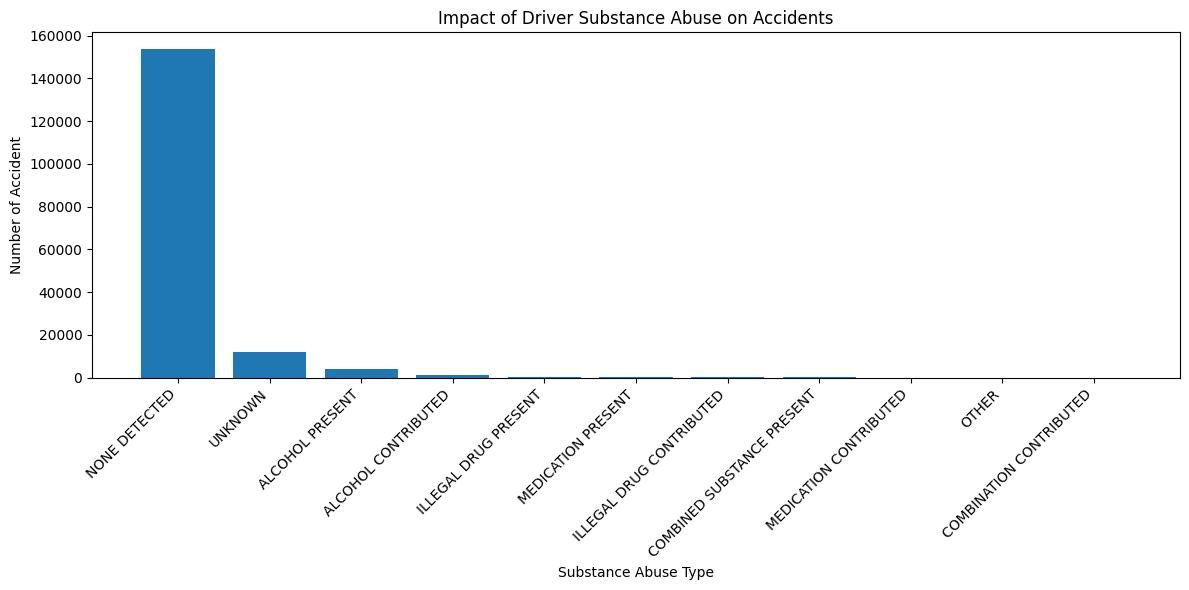

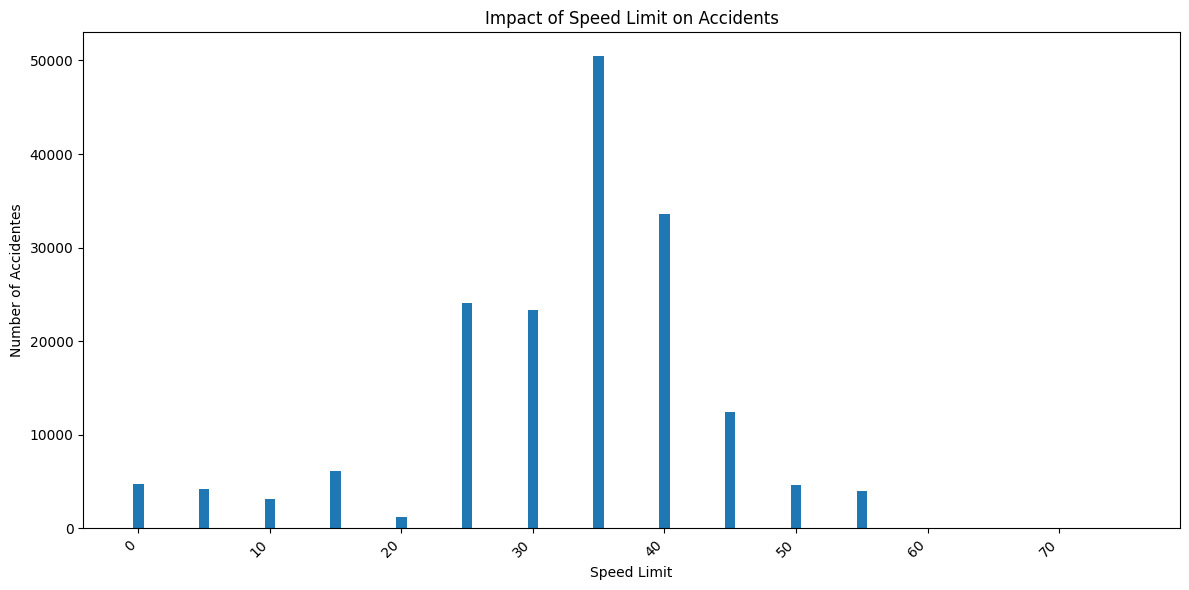

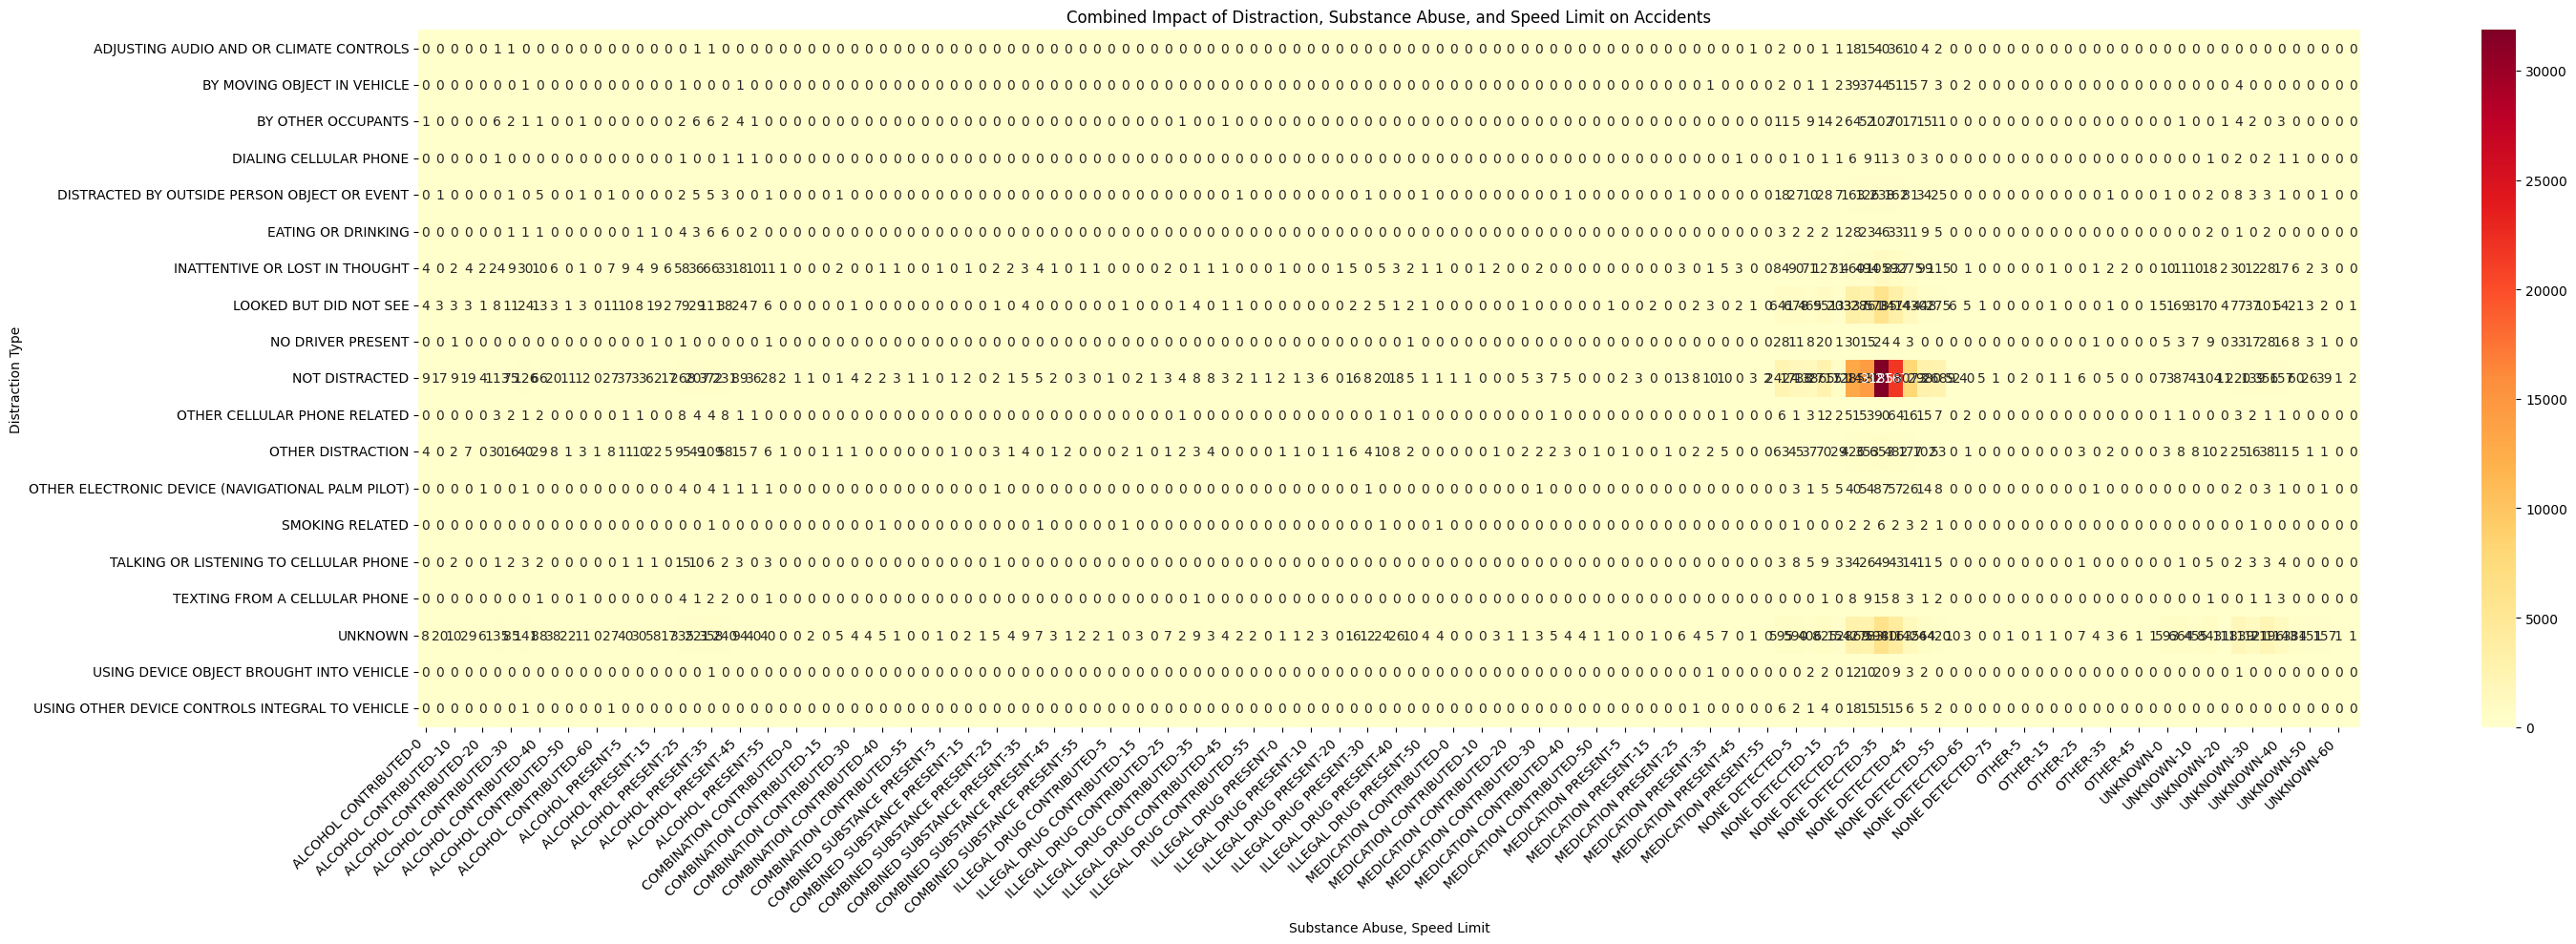

In [47]:
# Driver behavior analysis: Explore the impact of Driver Distracted By, Driver Substance Abuse, and Speed Limit on accidents.

# Driver Distraction Analysis

# Group by 'Driver Distracted By' and count Accident
distraction_counts = data['Driver Distracted By'].value_counts().reset_index()
distraction_counts.columns = ['Distraction', 'Accident Count']

# Exclude 'Not Distracted' category for clearer visualization
distraction_counts = distraction_counts[distraction_counts['Distraction'] != 'Not Distracted']

# Visualize distraction types and their impact
plt.figure(figsize=(12, 6))
plt.bar(distraction_counts['Distraction'], distraction_counts['Accident Count'])
plt.xlabel('Distraction Type')
plt.ylabel('Number of Accident')
plt.title('Impact of Driver Distraction on Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Driver Substance Abuse Analysis

# Group by 'Driver Substance Abuse' and count Accident
substance_counts = data['Driver Substance Abuse'].value_counts().reset_index()
substance_counts.columns = ['Substance Abuse', 'Accident Count']

# Exclude 'No Apparent Influence' category for clearer visualization
substance_counts = substance_counts[substance_counts['Substance Abuse'] != 'No Apparent Influence']

# Visualize substance abuse types and their impact
plt.figure(figsize=(12, 6))
plt.bar(substance_counts['Substance Abuse'], substance_counts['Accident Count'])
plt.xlabel('Substance Abuse Type')
plt.ylabel('Number of Accident')
plt.title('Impact of Driver Substance Abuse on Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Speed Limit Analysis

# Group by 'Speed Limit' and count Accident
speed_limit_counts = data['Speed Limit'].value_counts().reset_index()
speed_limit_counts.columns = ['Speed Limit', 'Accident Count']

# Visualize speed limits and their impact
plt.figure(figsize=(12, 6))
plt.bar(speed_limit_counts['Speed Limit'], speed_limit_counts['Accident Count'])
plt.xlabel('Speed Limit')
plt.ylabel('Number of accidents')
plt.title('Impact of Speed Limit on Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Combined Analysis (Distraction, Substance Abuse, and Speed Limit)

# Create a pivot table to analyze the combined impact
combined_impact = data.pivot_table(index='Driver Distracted By', columns=['Driver Substance Abuse', 'Speed Limit'], values='Report Number', aggfunc='count', fill_value=0)

# Visualize the combined impact using a heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(combined_impact, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Combined Impact of Distraction, Substance Abuse, and Speed Limit on Accidents')
plt.xlabel('Substance Abuse, Speed Limit')
plt.ylabel('Distraction Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Vehicle factors: Analyze the role of vehicle type, make, model, and year in accident causation

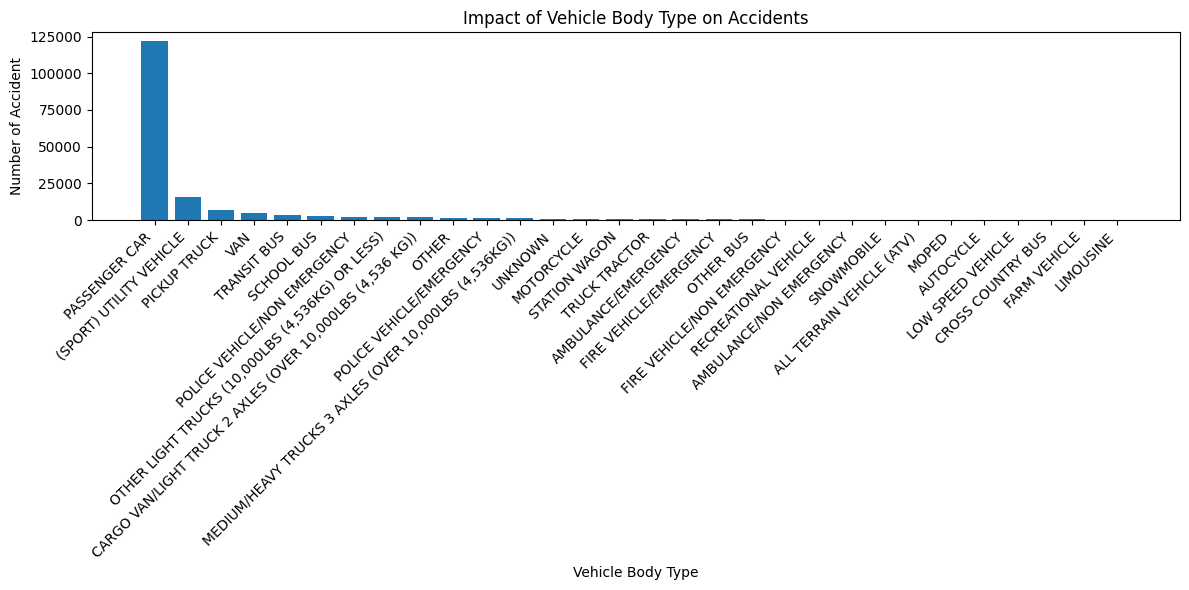

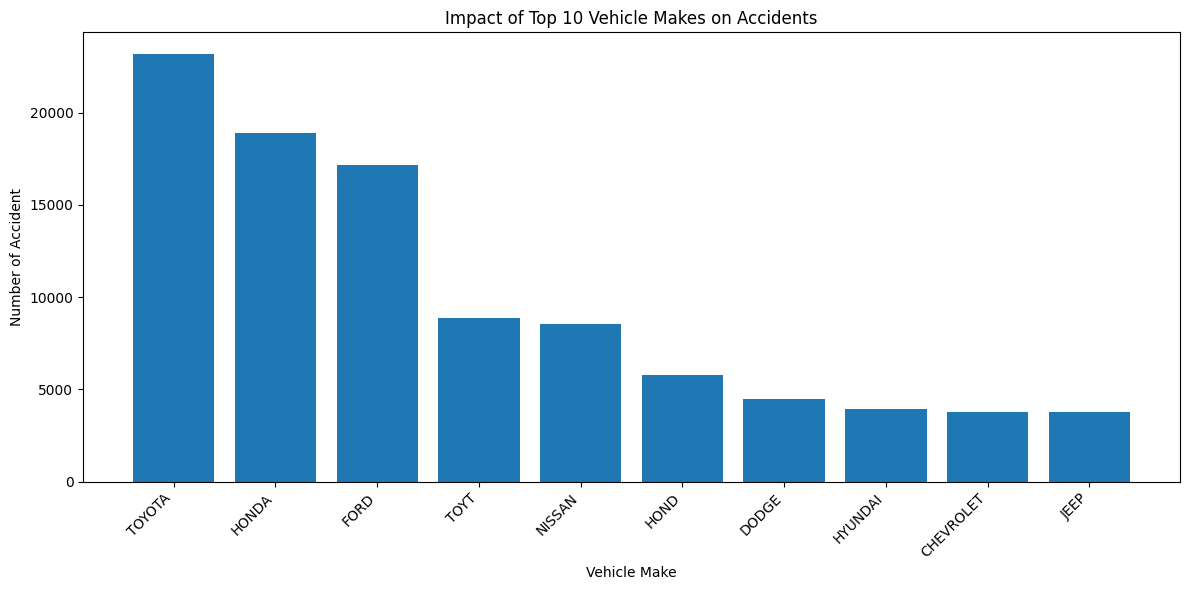

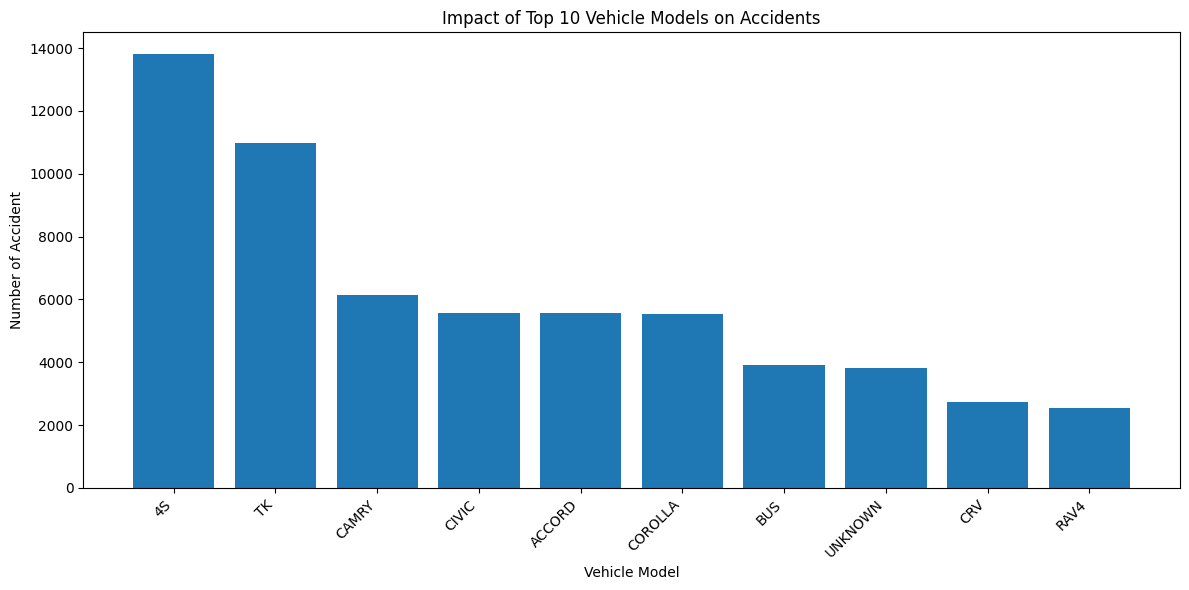

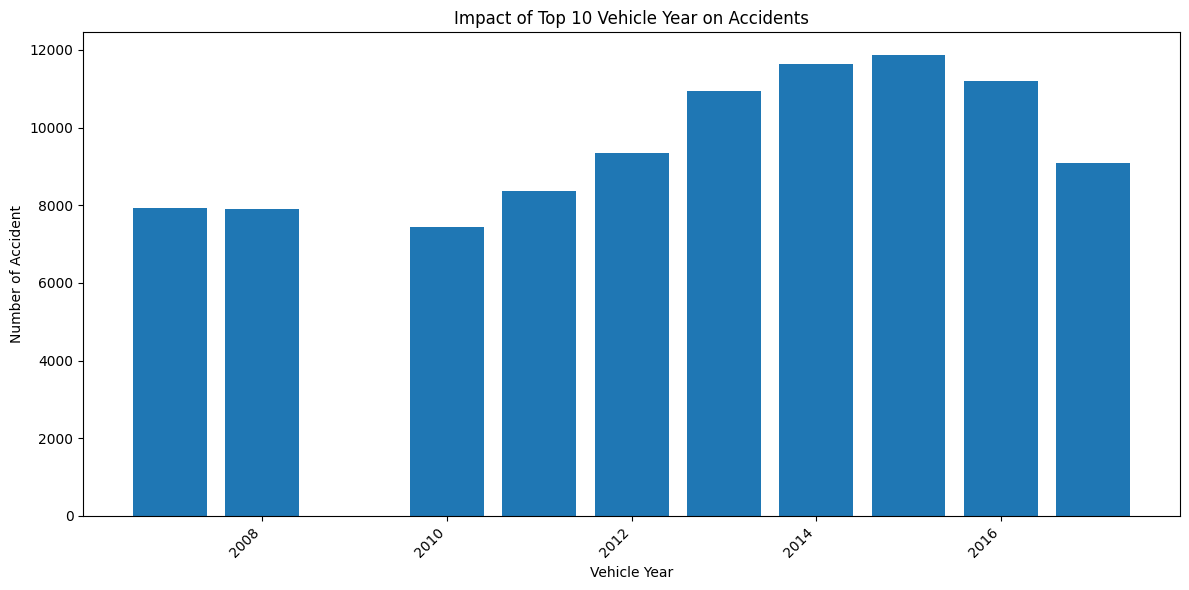

In [54]:
# Vehicle factors: Analyze the role of Vehicle Body Type, Vehicle Make, Vehicle Model, and Vehicle yYar in accident causation

# Vehicle Body Type Analysis

# Group by 'Vehicle Body Type' and count Accident
body_type_counts = data['Vehicle Body Type'].value_counts().reset_index()
body_type_counts.columns = ['Vehicle Body Type', 'Accident Count']

# Visualize vehicle body types and their impact
plt.figure(figsize=(12, 6))
plt.bar(body_type_counts['Vehicle Body Type'], body_type_counts['Accident Count'])
plt.xlabel('Vehicle Body Type')
plt.ylabel('Number of Accident')
plt.title('Impact of Vehicle Body Type on Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Vehicle Make Analysis

# Group by 'Vehicle Make' and count Accident
make_counts = data['Vehicle Make'].value_counts().reset_index()
make_counts.columns = ['Vehicle Make', 'Accident Count']

# Select top N makes for visualization (adjust N as needed)
top_n_makes = 10
top_makes = make_counts.head(top_n_makes)

# Visualize top vehicle makes and their impact
plt.figure(figsize=(12, 6))
plt.bar(top_makes['Vehicle Make'], top_makes['Accident Count'])
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Accident')
plt.title(f'Impact of Top {top_n_makes} Vehicle Makes on Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Vehicle Model Analysis

# Group by 'Vehicle Model' and count Accident
model_counts = data['Vehicle Model'].value_counts().reset_index()
model_counts.columns = ['Vehicle Model', 'Accident Count']

# Select top N models for visualization (adjust N as needed)
top_n_models = 10
top_models = model_counts.head(top_n_models)

# Visualize top vehicle models and their impact
plt.figure(figsize=(12, 6))
plt.bar(top_models['Vehicle Model'], top_models['Accident Count'])
plt.xlabel('Vehicle Model')
plt.ylabel('Number of Accident')
plt.title(f'Impact of Top {top_n_models} Vehicle Models on Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Vehicle Year Analysis

# Group by 'Vehicle Year' and count Accident
year_counts = data['Vehicle Year'].value_counts().reset_index()
year_counts.columns = ['Vehicle Year', 'Accident Count']

# Select top N years for visualization (adjust N as needed)
top_n_years = 10
top_years = year_counts.head(top_n_years)

# Visualize vehicle years and their impact
plt.figure(figsize=(12, 6))
plt.bar(top_years['Vehicle Year'], top_years['Accident Count'])
plt.xlabel('Vehicle Year')
plt.ylabel('Number of Accident')
plt.title(f'Impact of Top {top_n_years} Vehicle Year on Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

